#PyTerrier Text Scoring Explanation

This notebook demonstrates the use of an interaction diagram for PyTerrier_ColBERT.

## Setup

In [1]:
!pip install python-terrier
!pip install --upgrade git+https://github.com/terrierteam/pyterrier_colbert.git


  Cloning https://github.com/terrierteam/pyterrier_colbert.git to /tmp/pip-req-build-6ayzu4pc
  Running command git clone -q https://github.com/terrierteam/pyterrier_colbert.git /tmp/pip-req-build-6ayzu4pc
  Created wheel for pyterrier-colbert: filename=pyterrier_colbert-0.0.1-cp37-none-any.whl size=12044 sha256=f2309f2471fbeb994dd14420625996f4a5f4e480e5d7a6ed058144330dcd8893
  Stored in directory: /tmp/pip-ephem-wheel-cache-pswirv9n/wheels/7d/23/87/59bcb24958d35319315084fe0b193e9b0c15a1d384199dbaf3
Successfully built pyterrier-colbert
  Found existing installation: pyterrier-colbert 0.0.1
    Uninstalling pyterrier-colbert-0.0.1:
      Successfully uninstalled pyterrier-colbert-0.0.1


In [2]:
import pyterrier as pt
pt.init()

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


PyTerrier 0.4.0 has loaded Terrier 5.4 (built by craigm on 2021-01-16 14:17)


## PyTerrier_ColBERT 

Here, we load a ColBERT checkpoint created at the University of Glasgow on the MSMARCO passage ranking triples file.

In [3]:
checkpoint="http://www.dcs.gla.ac.uk/~craigm/colbert.dnn.zip"
import pyterrier_colbert.ranking
factory = pyterrier_colbert.ranking.ColBERTFactory(checkpoint, None, None)

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:221: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:237: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at bert-base-uncased were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model fr

[Mar 24, 18:17:58] #> Loading model checkpoint.
[Mar 24, 18:17:58] #> Loading checkpoint http://www.dcs.gla.ac.uk/~craigm/colbert.dnn.zip


/usr/local/lib/python3.7/dist-packages/torch/hub.py:452: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


[Mar 24, 18:18:10] #> checkpoint['epoch'] = 0
[Mar 24, 18:18:10] #> checkpoint['batch'] = 44500


## Interactions Figure

This interaction figure shows how a query and a document interact. In particular: 
 - the top sub-plot shows the contribution each query wordpiece to the document's score.
 - In the heatmap, darker colours indicate higher similarity between the query emebdding and the document embedding. 
 - ColBERT uses max_sim operator - for each query embedding, only the most similar document embedding contributes to the final score of the document. For each query embedding, we put an "X" mark in the row of document embedding that is the source of that maximum similarity for that query embedding.
 - \[MASK\] tokens are extra tokens added to the query by ColBERT. We can observe which document embeddings these match with.



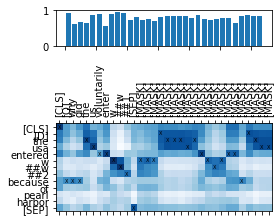

In [5]:
factory.explain_text("why did the us voluntarily enter ww1", "the USA entered ww2 because of pearl harbor")